# sourangshu@ineuron.ai

# Computer Vision

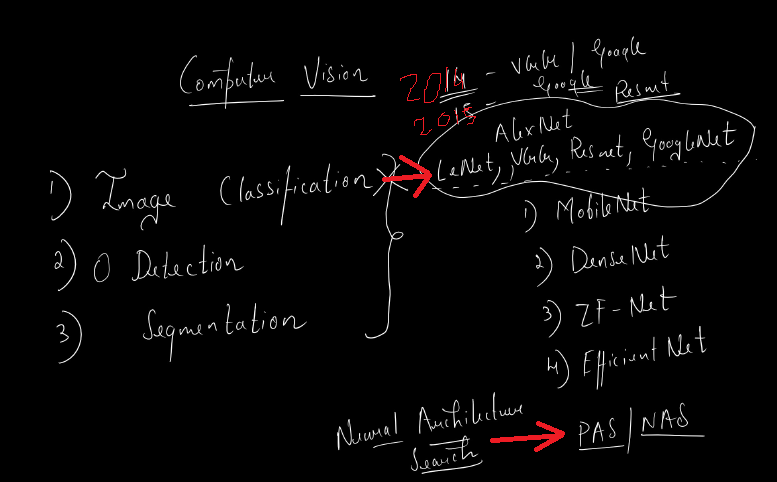

* DL revolves around loss function, the most important parameter
* with small loss functions such as the ones in CLASS/Obj Detection/Obj Segmentation  we can use SGD
* for tasks with GAN which have a 6 digit loss, then we can only work with ADAM since is faster than SGD

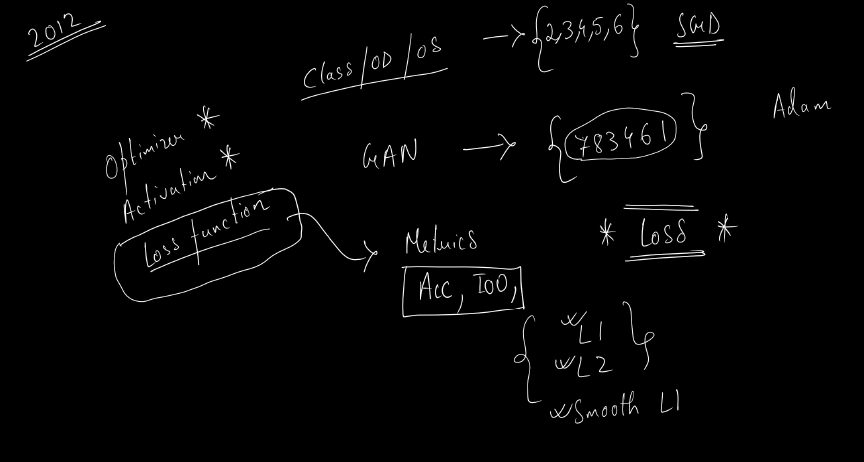

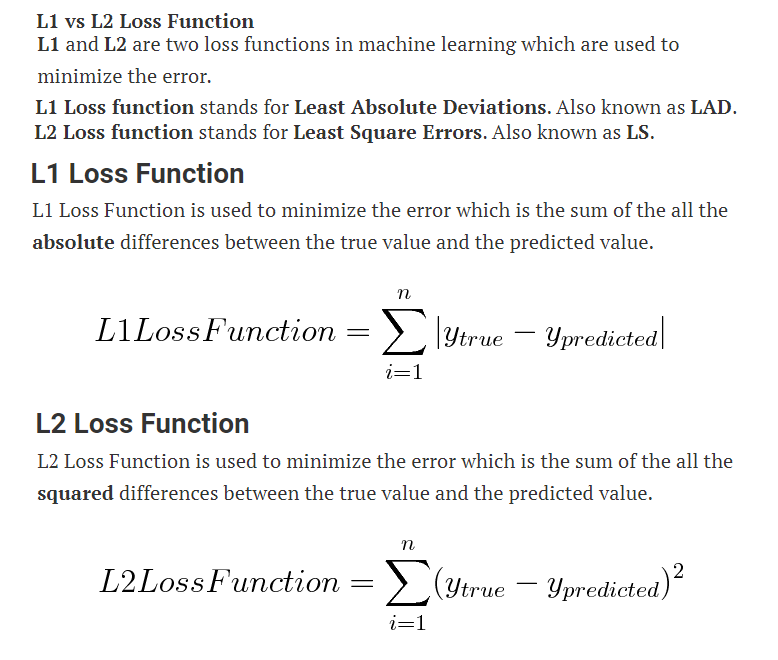

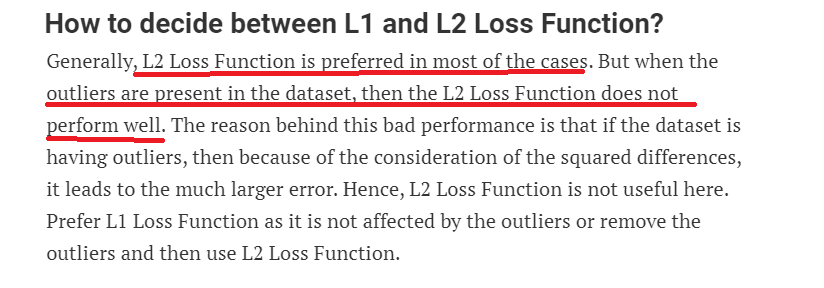

* smallest part of visualization  -  Pixel, the biggest is a scene of a video

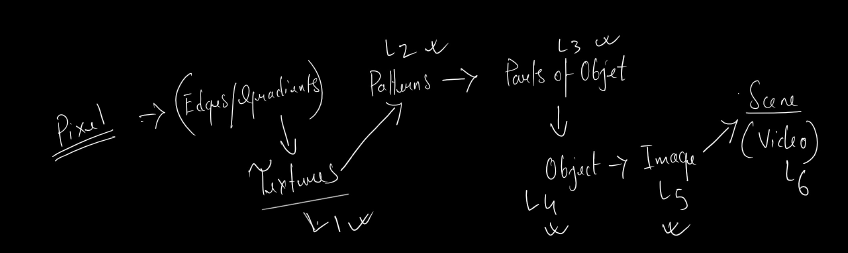

* mayors blocks used when dealing with figures:
    * Convolution
    * trasnitional block - pooling  (after pooling we loose dimentions)
    
   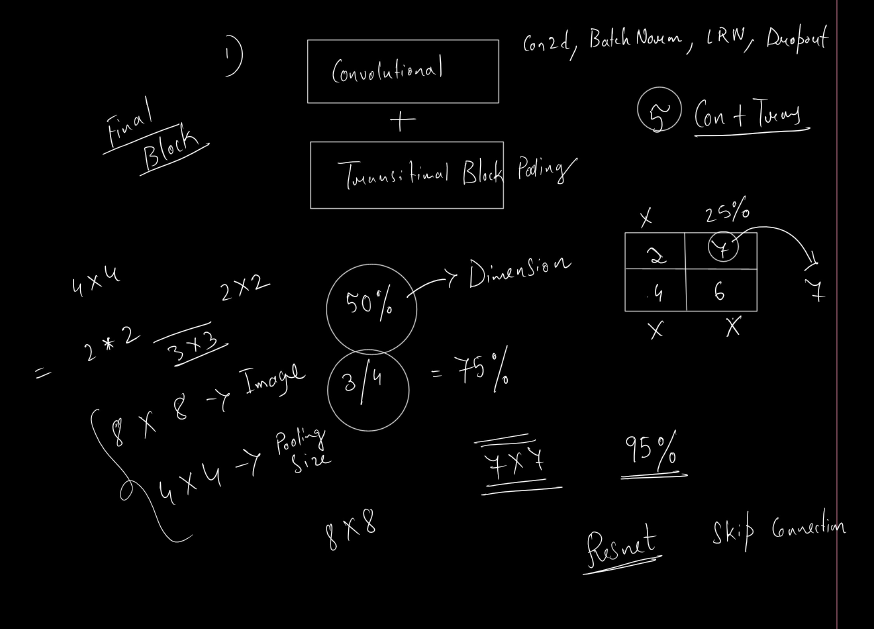 
   
   * for input image 4x4 and a poooling of 2x2 we reduce the dimension to 50% and loose the 75% of the data
   * for input image 8x8 and pooling of 4x4 you will lose around 95% of the data

* the hole idea is to change from the input 64,64 to as close as possible to  1,1
* to go from a 4x4 to 1x1 then you need to use a kernel of 4x4
* at the end of the day you want a light weight network

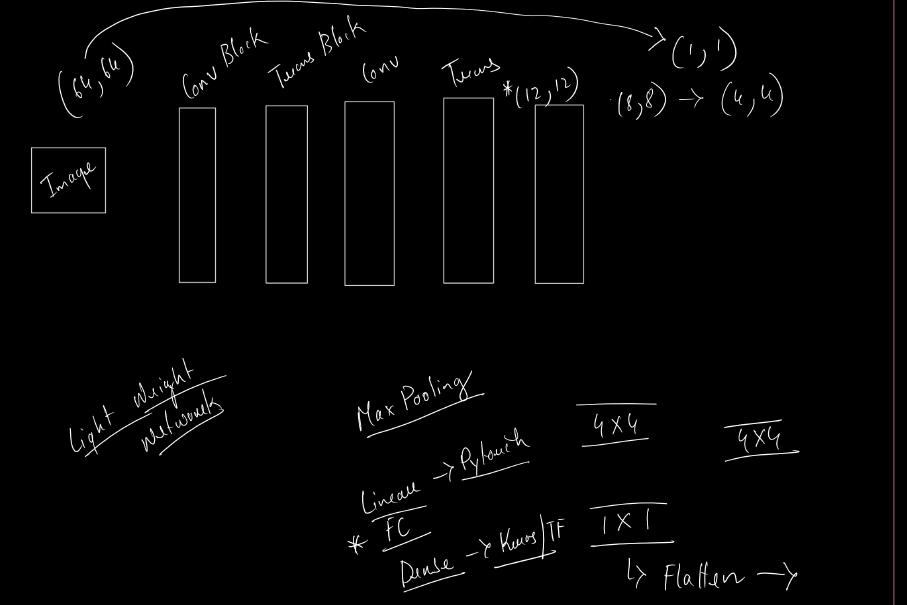

* lets say if you have 10 diff classes
* can you not use the fully connected before softmax?

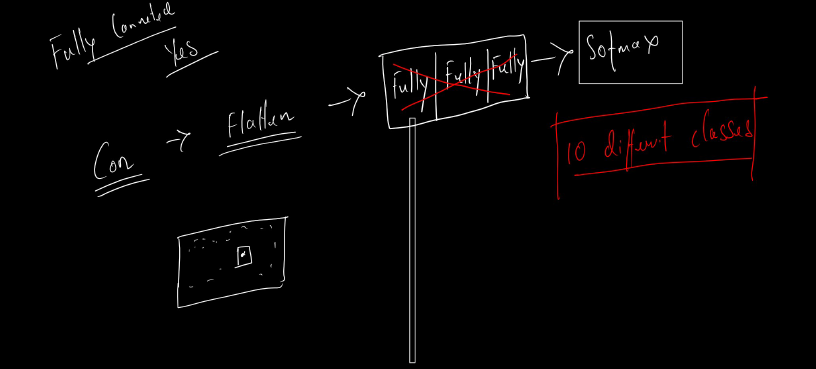

so if we use a convolution with a bigger dimension then we end up with a 1x1 dimension and so we use 10 of those filters one for each feature, then we can flatten and then softmax

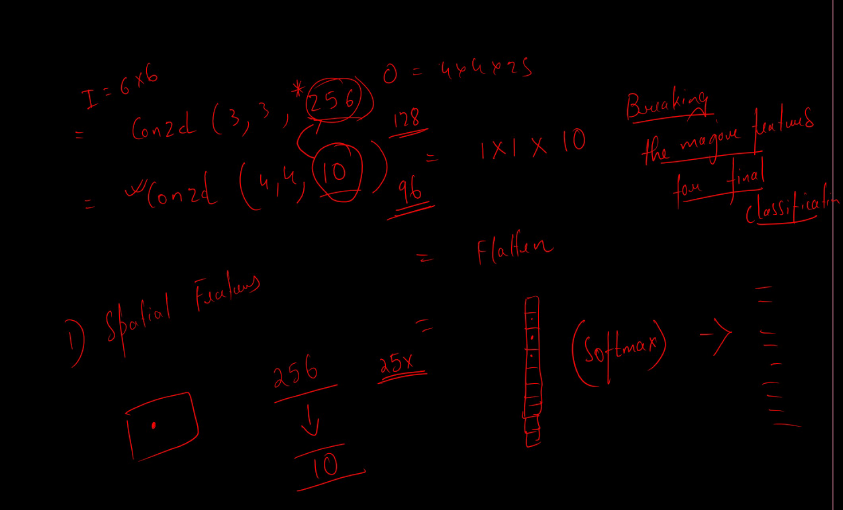

* type of hardware required?
* NVIDI is the leader , started with th GTX1080 GPU and optimized the 3x3 convolutiion, it works fast on it
* so if you need to use 5x5 then you can use twice a 3x3 which will provide a total of 3x3 + 3x3 = 9+9 = 18
* but if i use once a 5x5 i will get 25
* 18/25 is around a 7 parameter gap so in term of parameters twice 3x3 is better

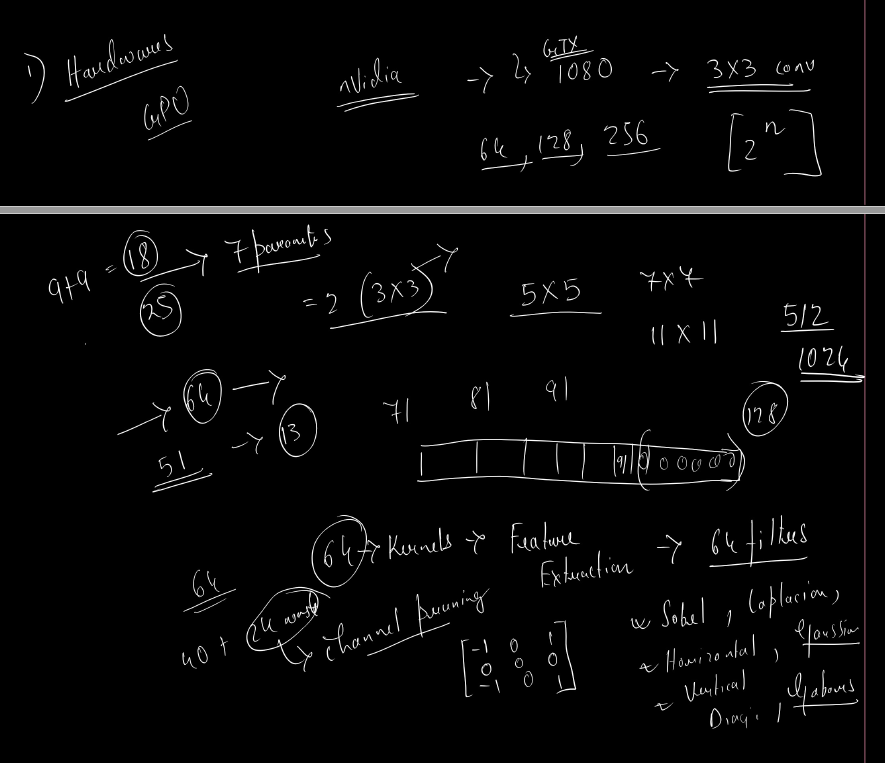

* since the digital data is organized in binaries which are related to 2^n
* so ve use multiples of 2^n with values such as 64,128,256

* custom filters 3x3:  horizontal, vertical, sobel, laplacion, gaussian, gabors..

# CLASSIFICATION  - the issue is that we do not know where the object is, therfore there is a localication issue

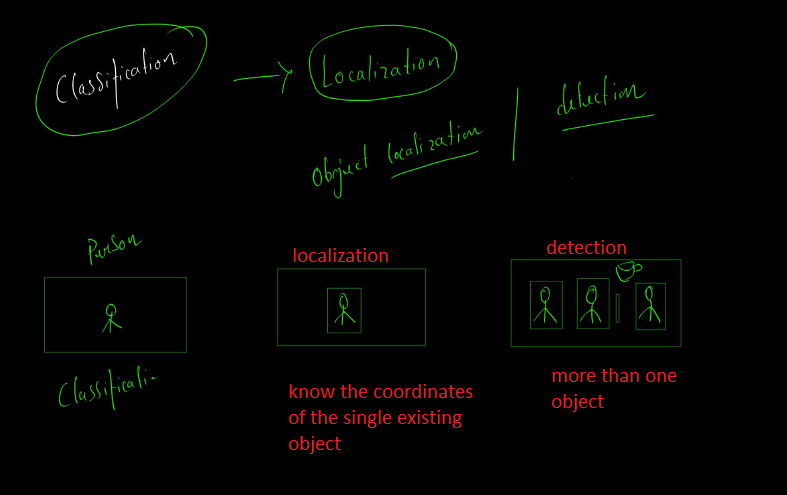

* in object detection there are two tasks, we need the class and the coordinates of the class object

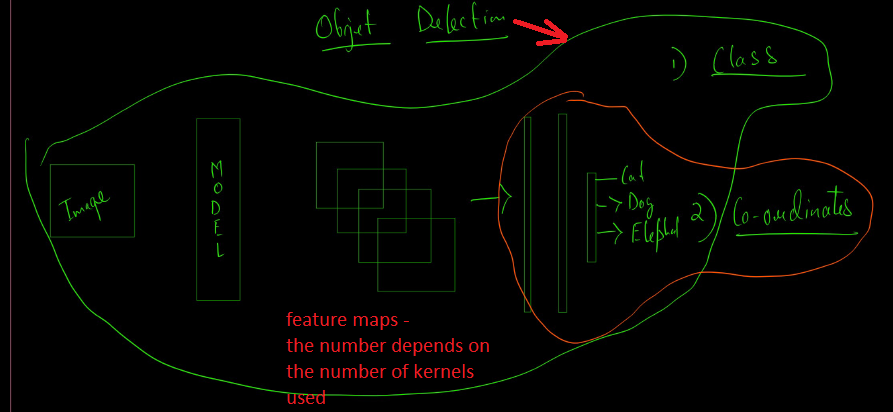

* a bounding box is a box that depends on the size of the object, therefore can have different sizes and shapes
* there are two ways to privde a bounding box

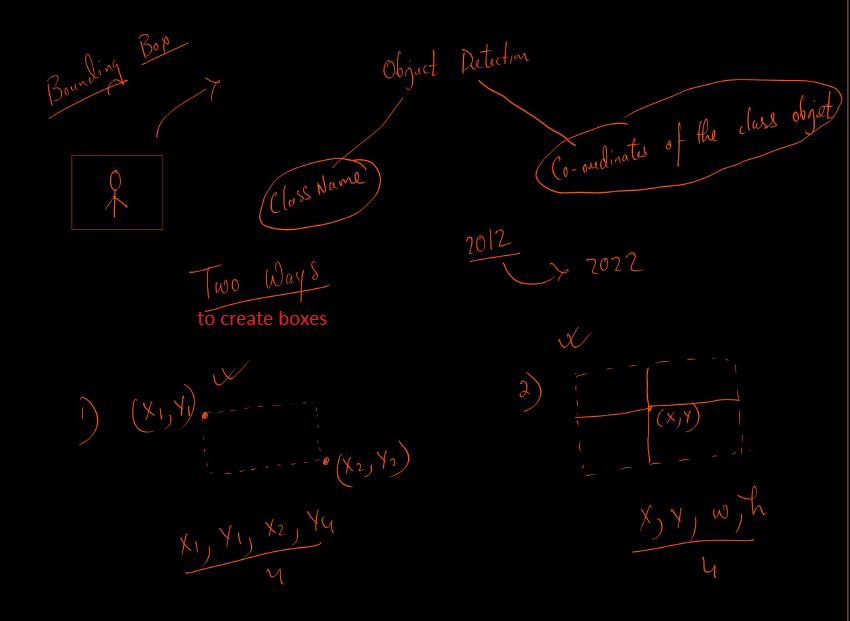

* in an image you provide the ground trueth (the annotation done manually, so we know the coordinates of the box before hand)
* the model predicts another box
* the goals is to minimize the loss between the ground trueth and the predicted box
* so we do this by bouding box regression - th emain output are the coordinates of the bounding box  (loss functions MSE, ME, RMSE)

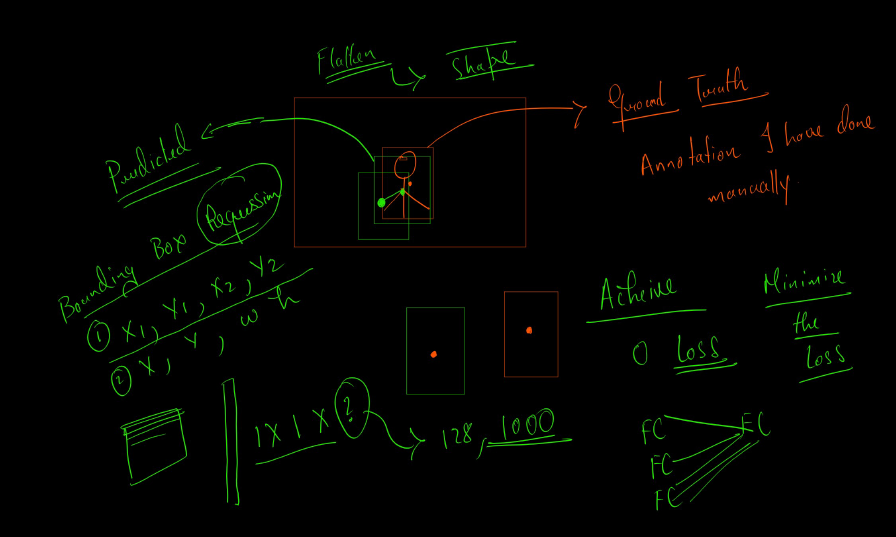

* the goal is to minimize the loss between the ground truth and the predicted bounding box

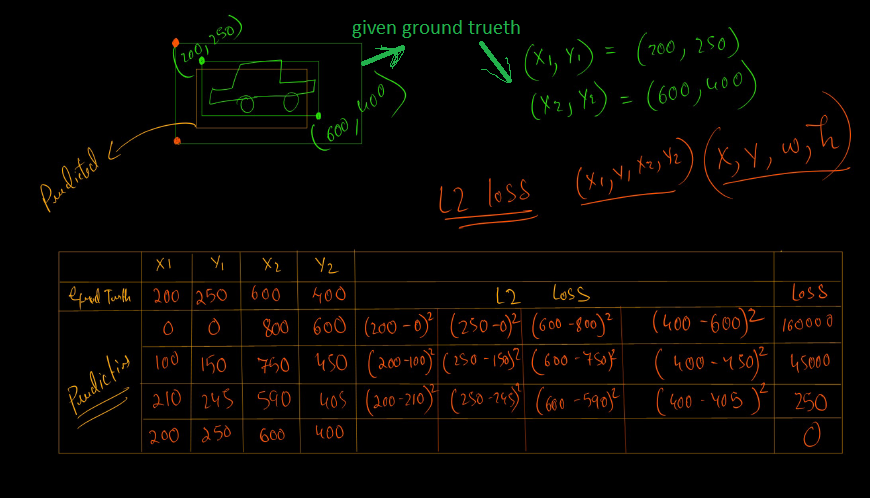

# https://whimsical.com/rcnn-family-E4XGTB65LYy6Wz7JnTM829

# https://arxiv.org/pdf/1311.2524v5.pdf

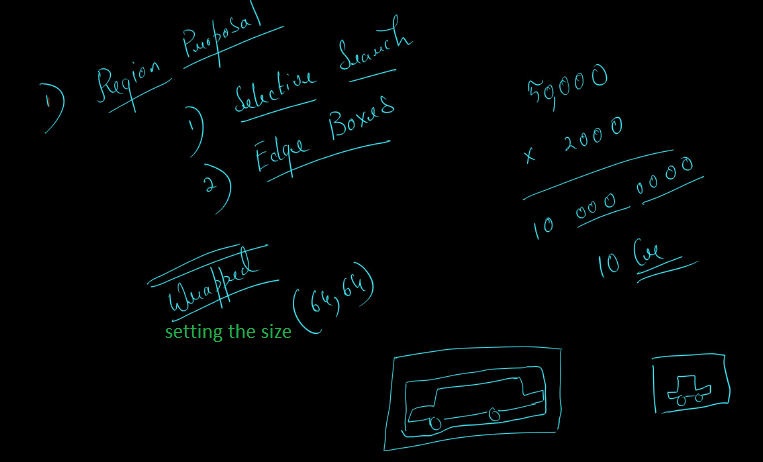

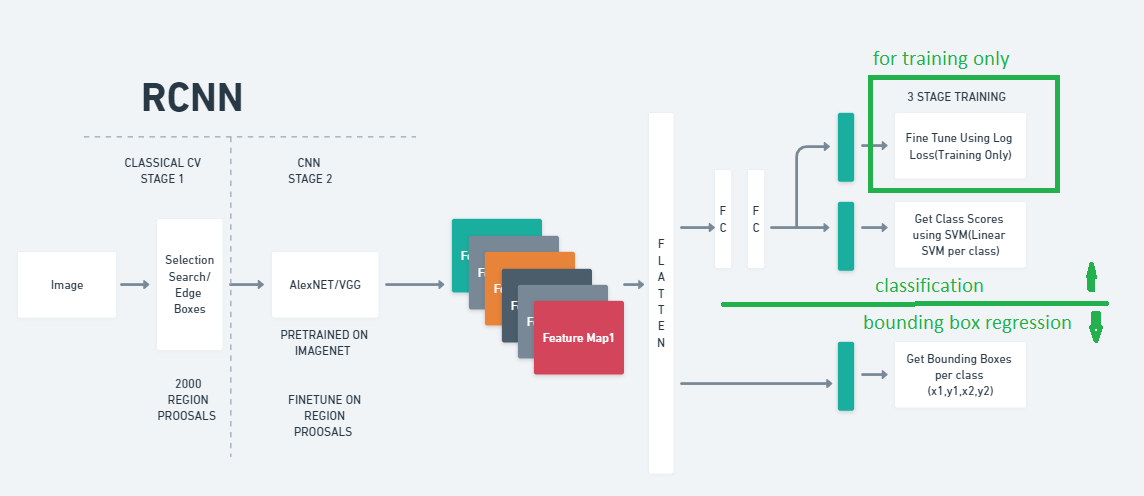

* we use a pretrained CNN model - ALEXNET/VGG
* input our data to the model for training, the log loss function is used to fine tune the outputs
* svm for classificatin
* bonding boxes for regression

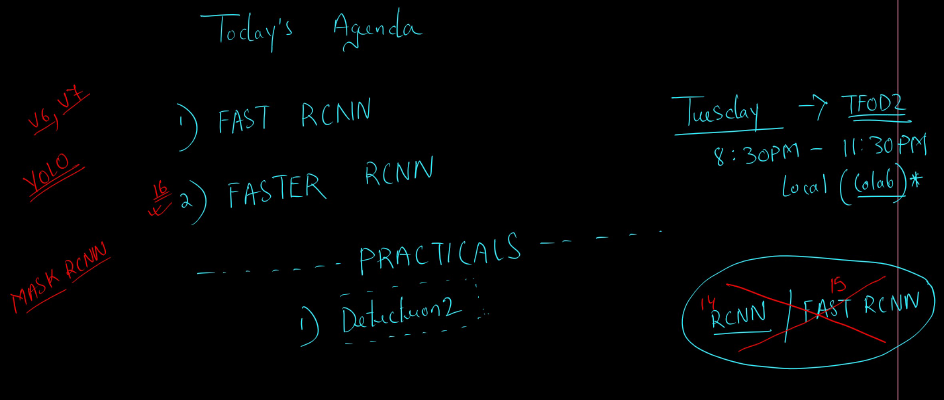

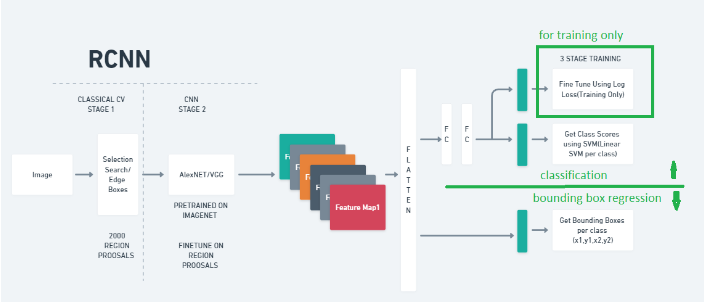

in the classical cv stage:

* region proposal where the object is present , that is the expectation
* that region proposal is wrapped (wrapped operation) from the image and the images selected will be set to a fix size, lets say 96x96.
* unfortunatelly due to the  wrapp operation we lose scale and also get scale distortion

in the cnn stage 2:
* generates feature maps
* then flatten
* you get classification and regression
* in the classification branch you can also do training and will update the full connected layers
* once training finished then use SVM for prediction (classification)
* here we use run time - which means the training goes continuosly
* here we miniminze the classification loss

in the regression branch we deal with regression after the classification part is finished in the classification branch
* we use bounding boxes
* when sending too many region proposals ,  a lot of background (treated as noise) is sent also and that creates false positives...

https://whimsical.com/rcnn-family-E4XGTB65LYy6Wz7JnTM829

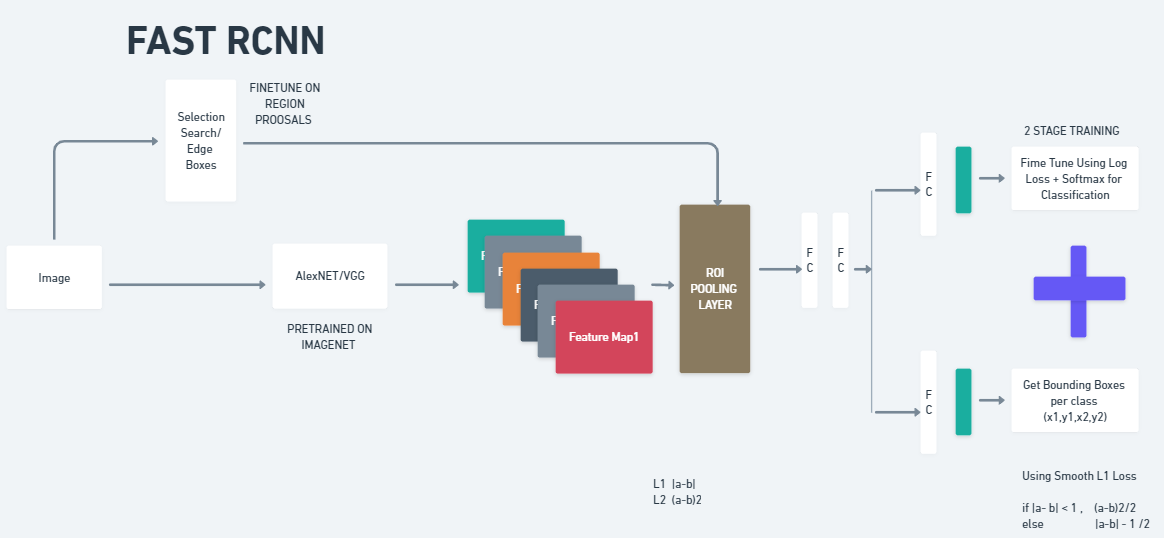

* two things go at the same time, send images to the alexnet/vgg and  send images (all at the once) for regional proporsals for finetuning
* send them to the feature map
* align region proposals to feature maps, this tells you if there is an image in that feature map
* ROI pooling layer, takes tWo inputs, RP and FM
* What happent to max pooling after back propagation 
  backpropagation is to see what weights and inputs influences your loss in what way. 
  In case of max pooling only the max of the neurons influences the output (except for when there is a tie). 
  So only propagate the error to the neuron that had the maximum activation value
* when finetune, remember that since we use a pretreained model, it has a lot of features, therefore the first two convolutions
  see only small details and therefore is not worth it to retrain them, usually one concentrates in the deconvolutions 3,4 , etc.

* there are common FC and there are specific FC for regression and for classification

paper:  https://arxiv.org/pdf/1504.08083.pdf

https://deepsense.ai/region-of-interest-pooling-explained/

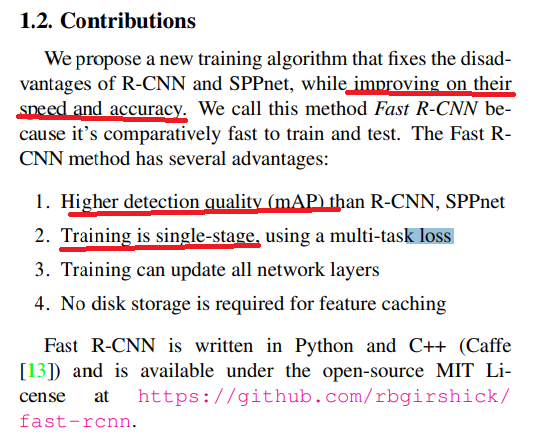

# improving the performance:

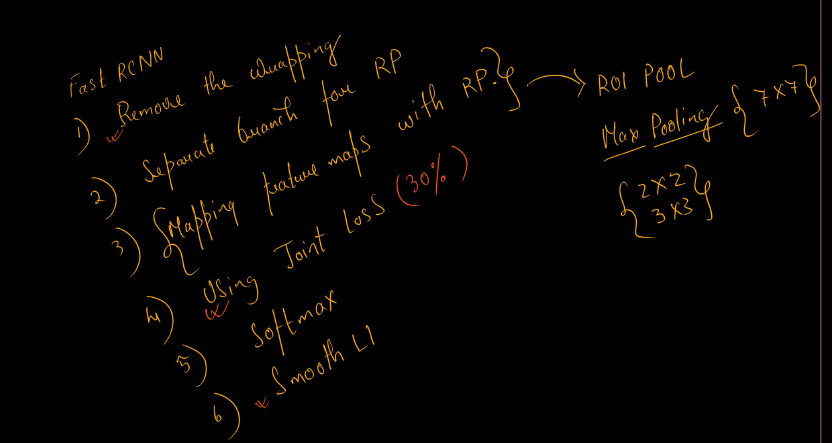

# FASTER RCNN

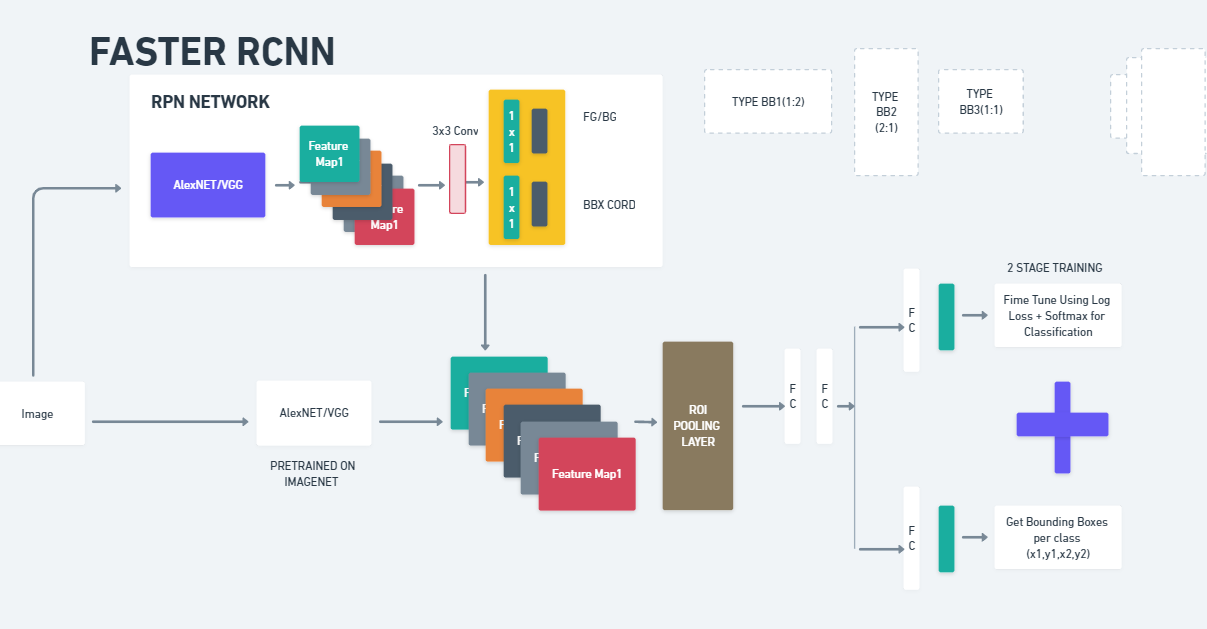


https://arxiv.org/pdf/1506.01497.pdf

* Selection search and edge boxes are usually used for region proposal, here a RP Network is used
* uses only 300 proposals for image, so they reduced here in comparison with RCNN
* they use 1x1 convolution (resnet) is a point wise convolution and is used to reduce features

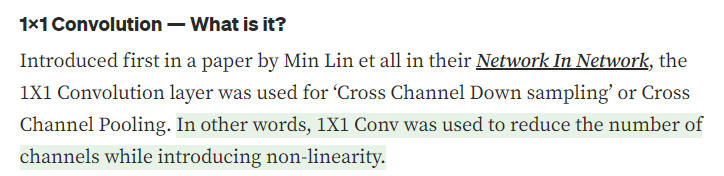


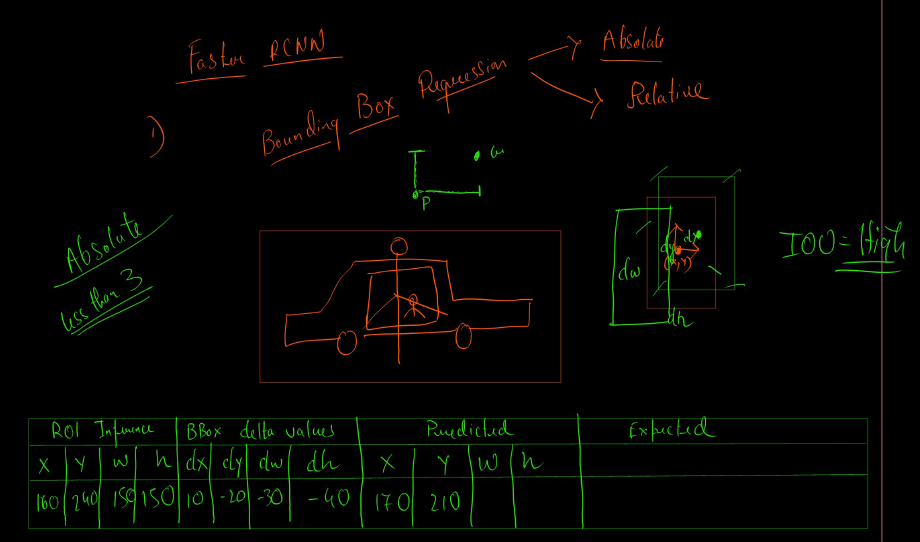

* We want to minimize the loss of the distance between the center of the ground truth and the predicted
* this means there would be some changges in dx, dy, dw, and dh to minimize the distance loss
* bounding box goes more from absolute to relative to get better PR


* OVERLAPPING OBJECTS:
* for this we use anchore boxes, and several (nine)sliding windows of differente sizes are looking for objects

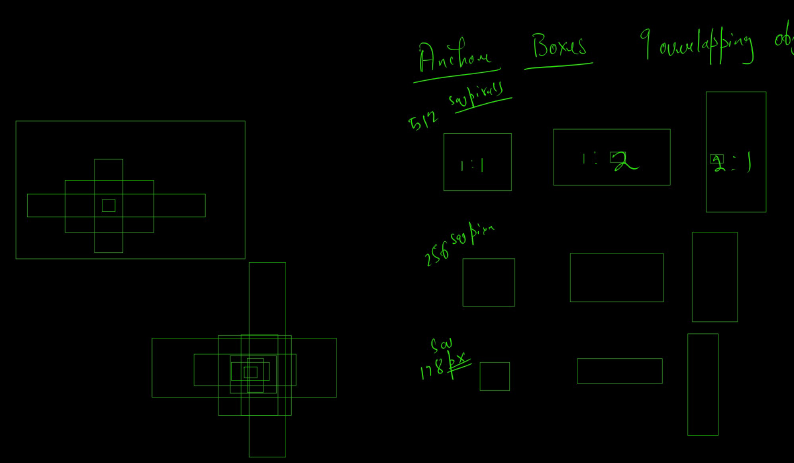


# use of detectron2 library for object detection

# installation

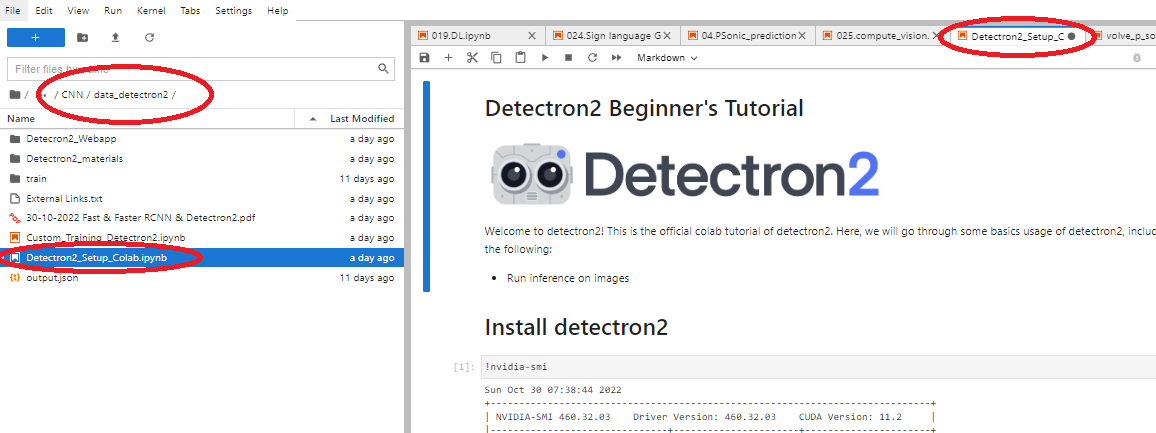


* check GPU

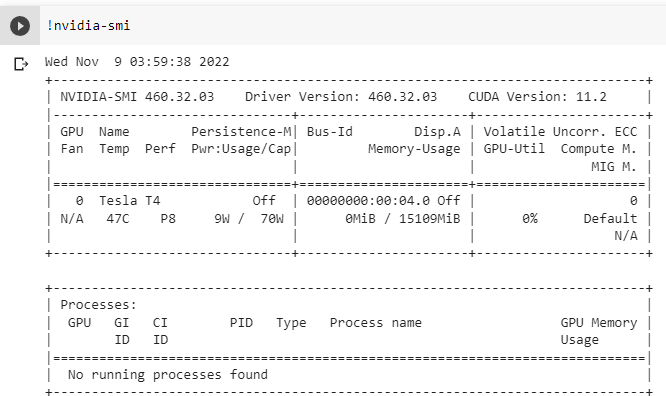

* install payaml since we will be using it
* import torch
* get the torch and cuda versions
* https://github.com/facebookresearch/detectron2

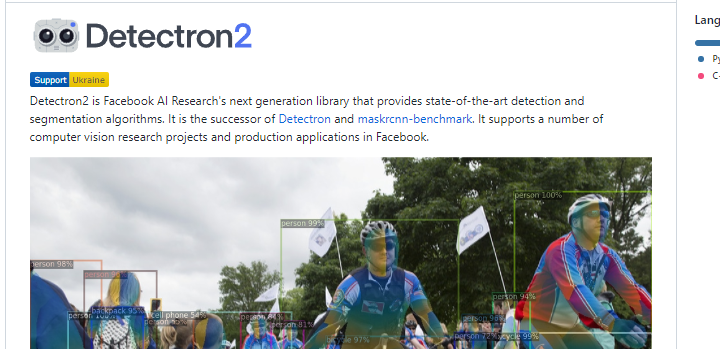

* they use rotating bounding boxes
* pip install the detectron2 project
* https://detectron2.readthedocs.io/en/latest/tutorials/install.html

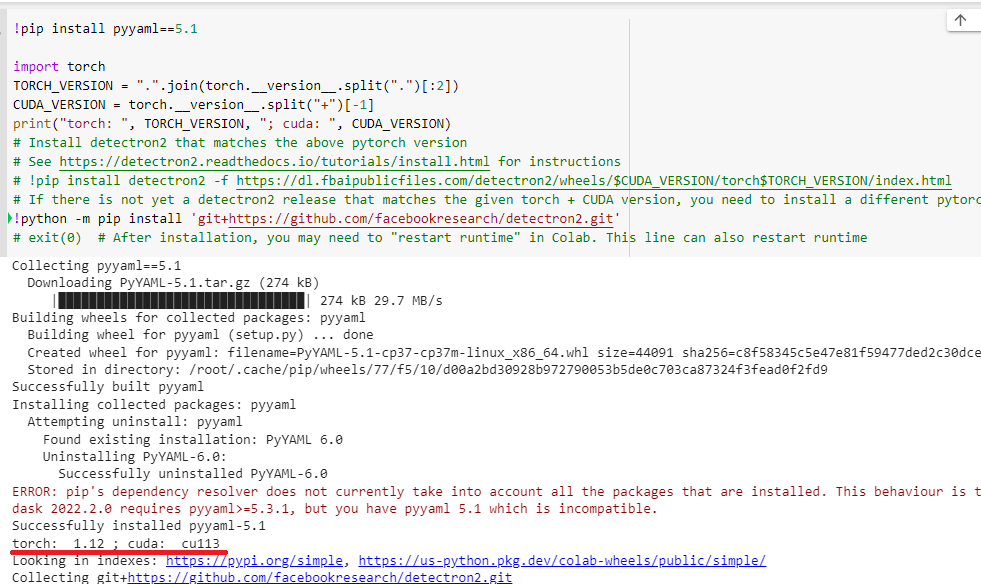


* so detectron2 is a library that allows you detection and segmentation algorithms, is build on top of torch and the wrap up is called detectron2

# basic setup 

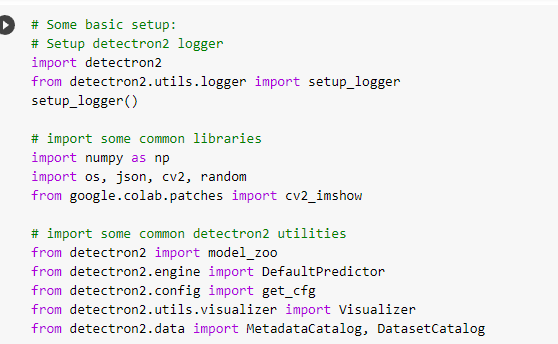

* model_zoo imports a passed model into colab
* cv2_imshow for display purposes

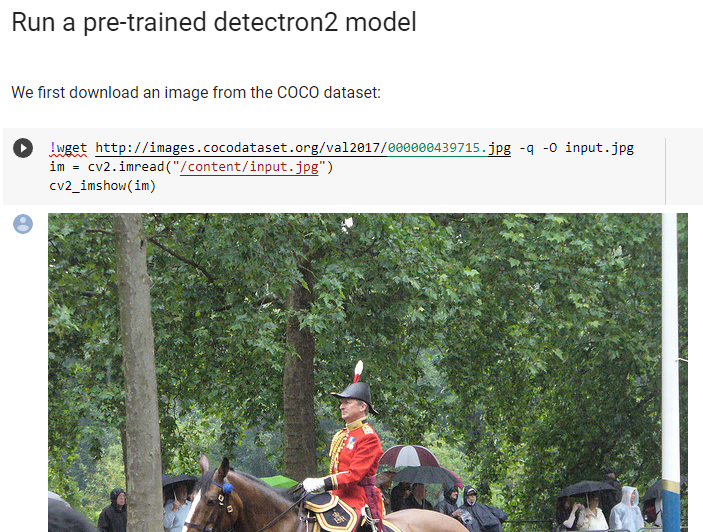

* you can find the list of the tasks that can be assigned to MODEL_ZOO and the model names:

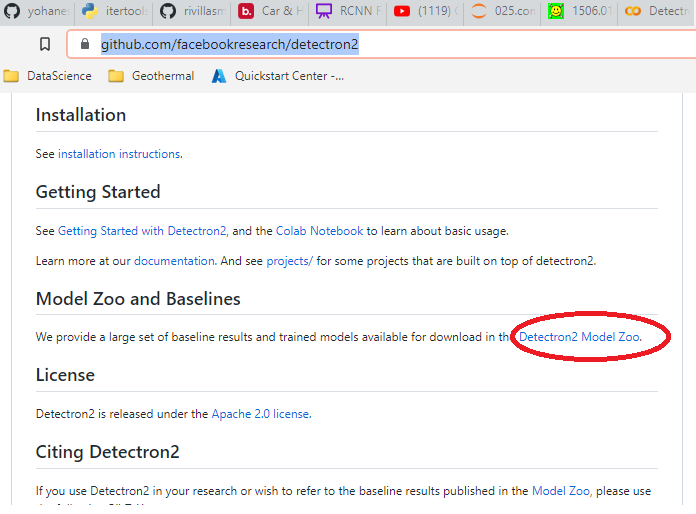

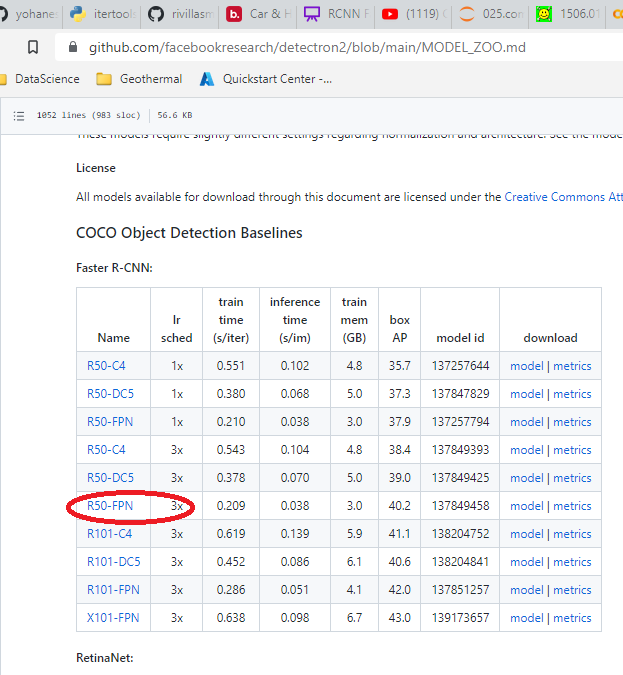

* copy the address

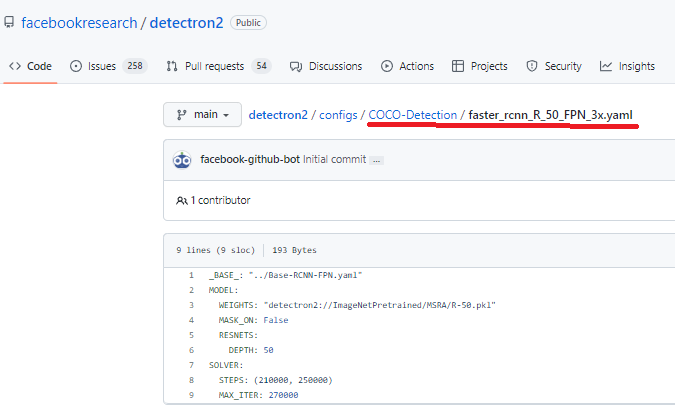

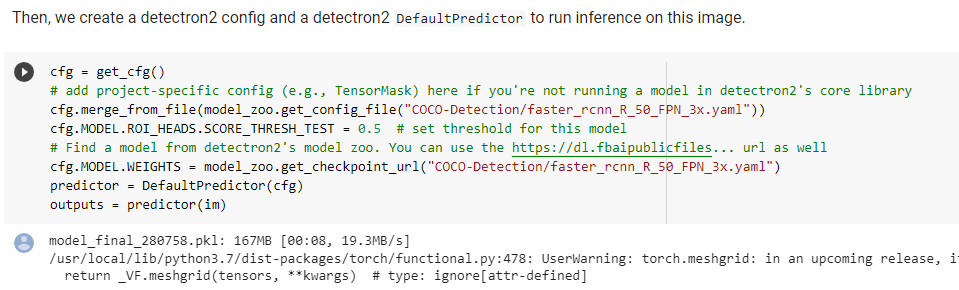

* shows the outputs - boxes

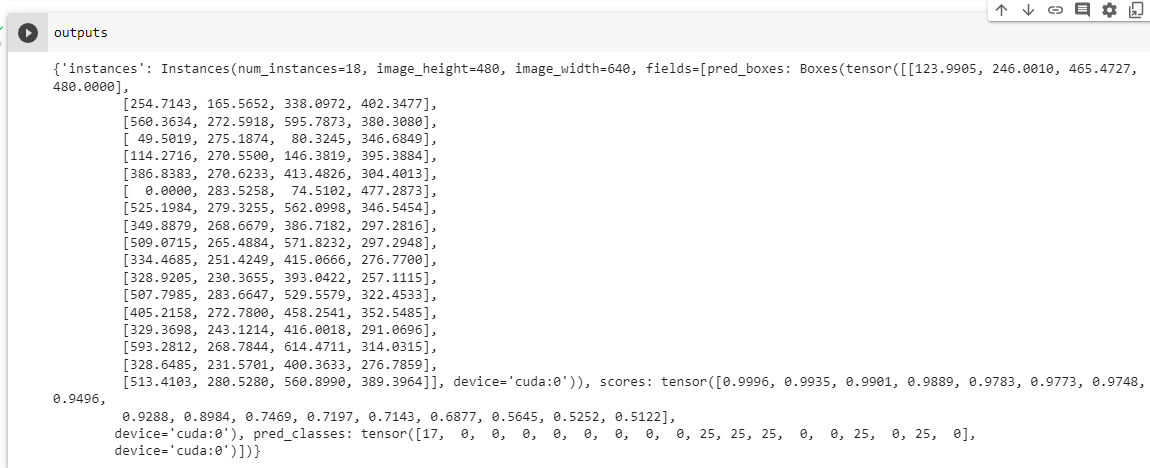

* look at the prediction classes and boxes

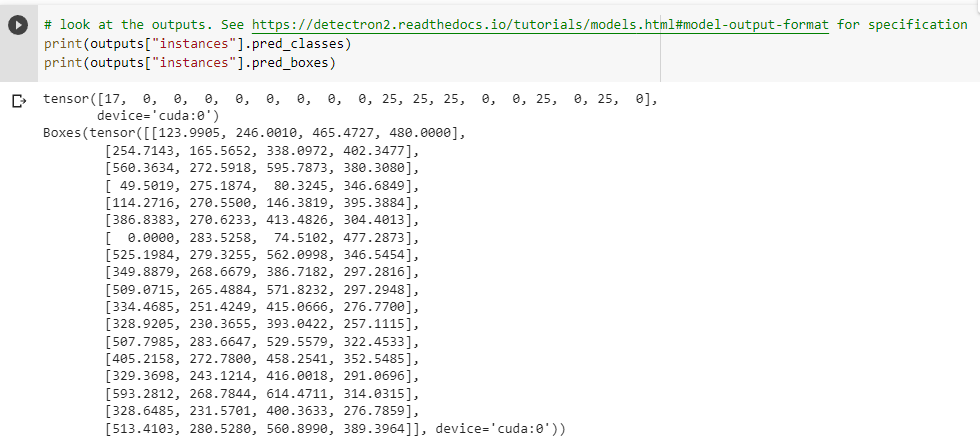

* draw the predictions on the image

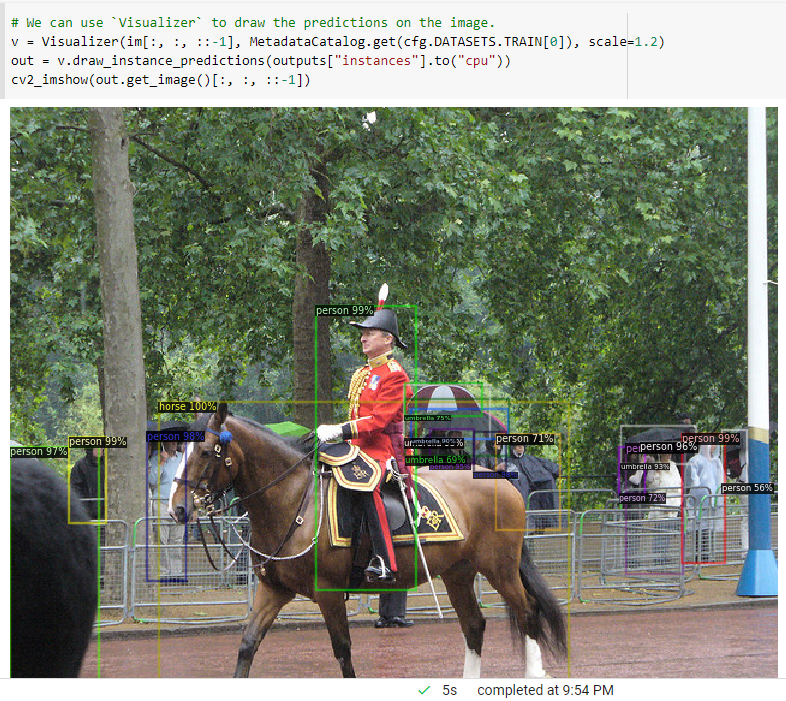

# custom train detectron2

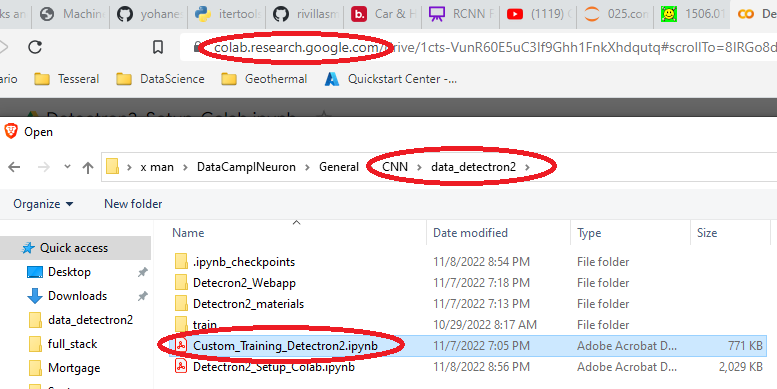

# for labeling images you can use:

* https://github.com/heartexlabs/labelImg
* use the "labellmg.exe" executable file

* open a terminal to create a virtual environment

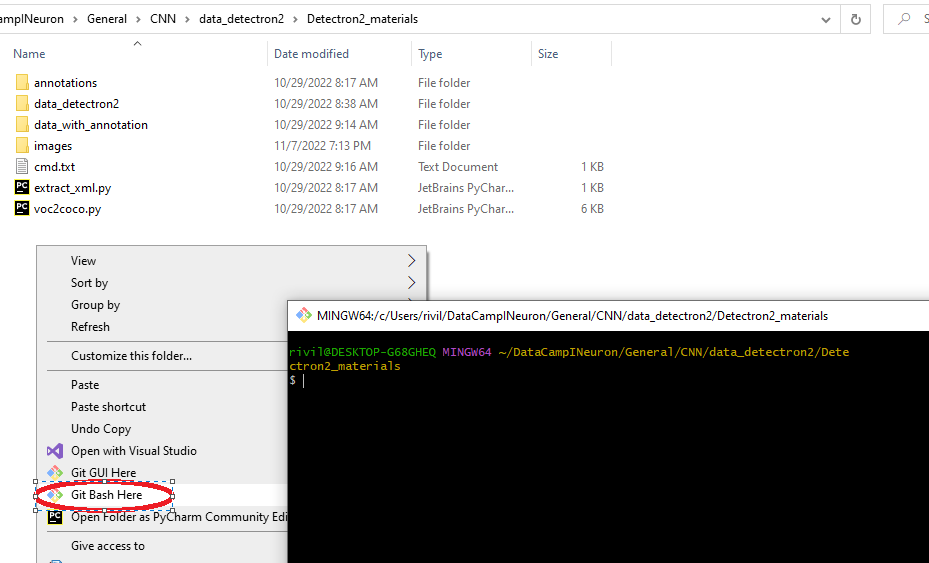

* install the label image file

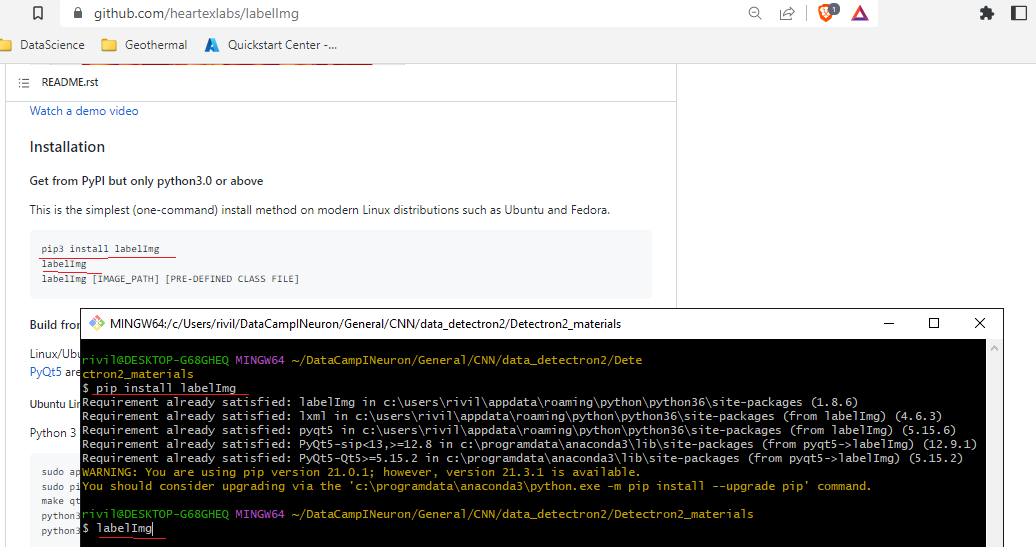

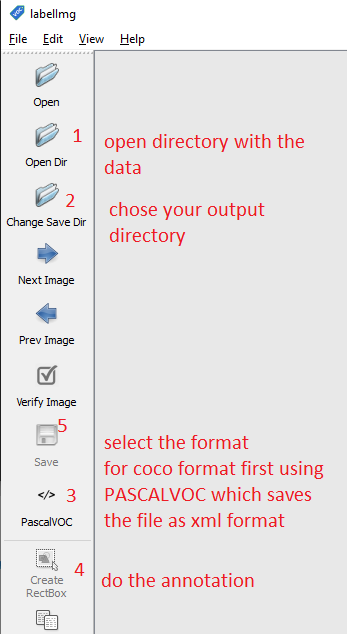

* example of xml file format, remember xml is obtained after labeling in format PASCALVOC

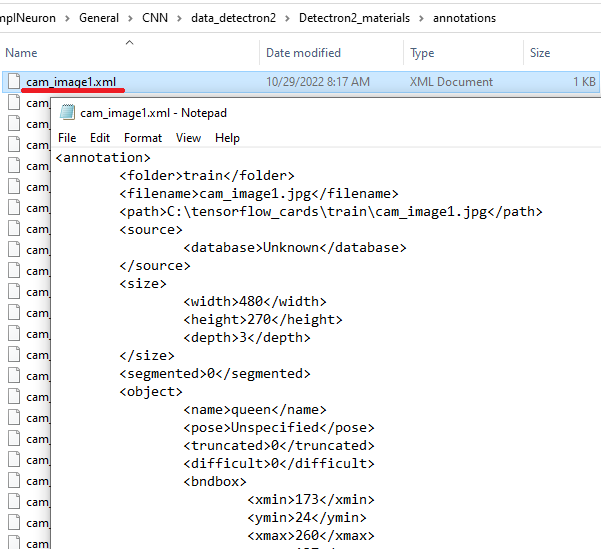

* it shows the given coordinates (the box you selected), the given name, the width/hight/depth of the image, the name and the path name

* you then finish the annotation of all your images, the final result is in the ...CNN|data_detectron2|detectron2_materials|annotation folder

you can use "extract_xml.py" also

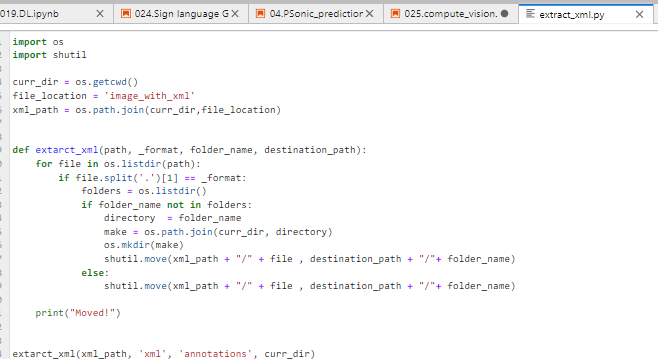

* then convert the data from xml into coco format

you can use "voc2coco.py"

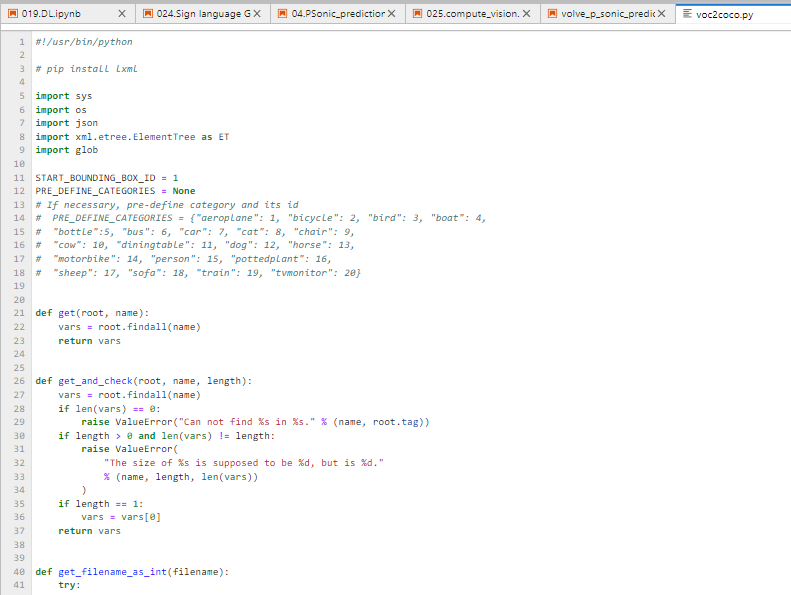

* convert from VOC to coco format, use the command provided in the "cmd.txt" file
* all the output will be saved in a output.json file
* json file will contain all the info 

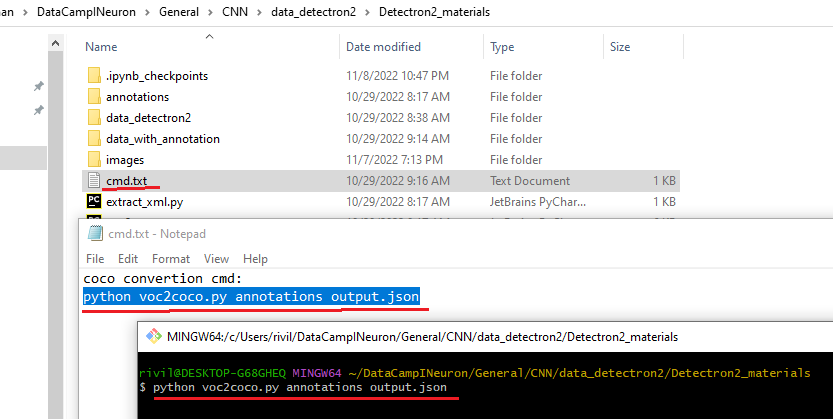

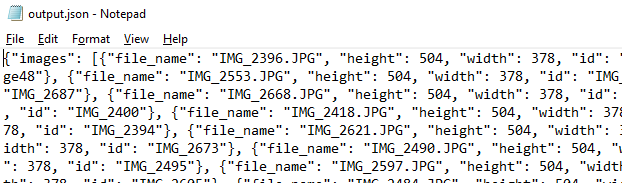